<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/wavelet_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  pip install PyWavelets


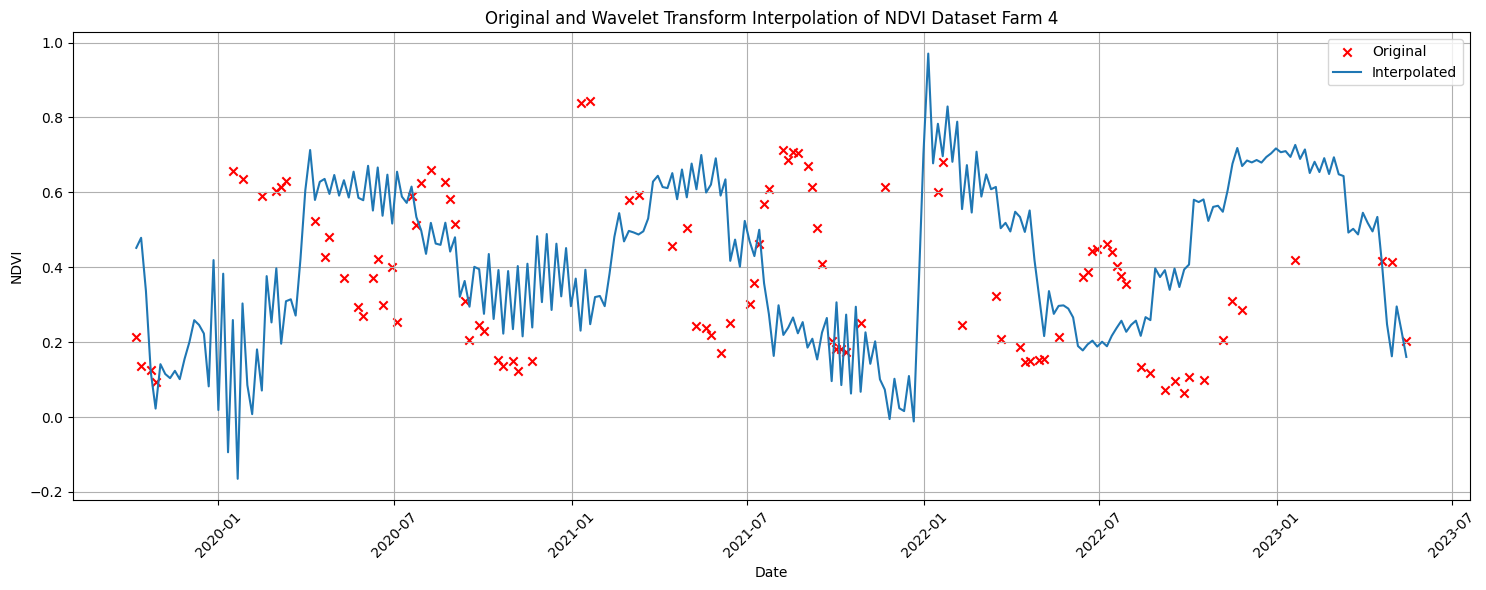

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pywt

# Read the NDVI data from a CSV file
df = pd.read_csv('/content/farm4.csv')

# Rename the columns to "Date" and "NDVI"
df = df.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)

# Calculate the wavelet transform of the NDVI values
wavelet = 'db4'  # Choose the desired wavelet
cA, cD = pywt.dwt(df["NDVI"].dropna(), wavelet)

# Extend the coefficients to match the length of the date range
cA_extended = np.repeat(cA, len(df) // len(cA*100))
cD_extended = np.repeat(cD, len(df) // len(cD*100))

# Interpolate the extended coefficients using inverse wavelet transform
reconstructed_values = pywt.idwt(cA_extended, cD_extended, wavelet)

# Interpolate the reconstructed values to match the length of the date range
reconstructed_values = np.interp(np.arange(len(df)), np.arange(len(reconstructed_values)), reconstructed_values)

# Create a new figure to display the results
plt.figure(figsize=(15, 6))

# Plot the original data and the interpolated values
plt.scatter(df.index, df["NDVI"].values, marker="x", label="Original", color="red")
plt.plot(df.index, reconstructed_values, label="Interpolated")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original and Wavelet Transform Interpolation of NDVI Dataset Farm 4")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#linear interpolation

Equation of the trend line: y = -0.000610x + 0.474446
Percentage change over the given time period: -5.14%


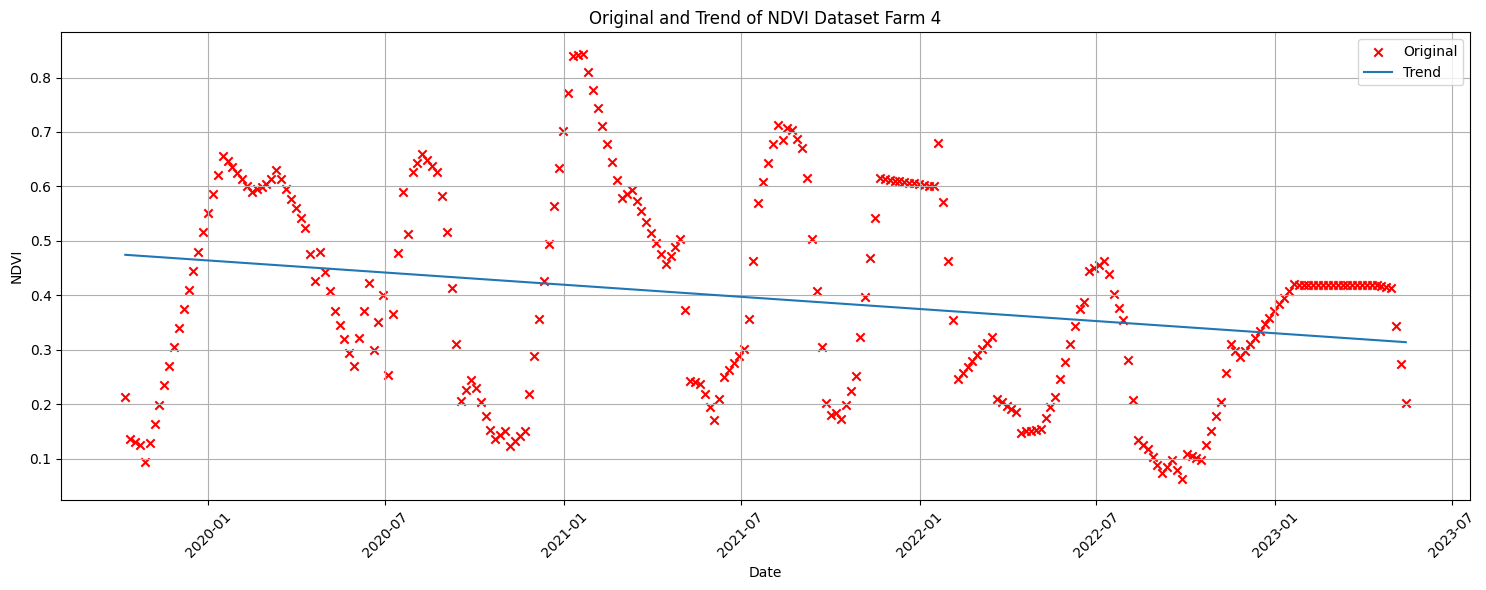

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('/content/farm4.csv')

# Rename the columns to "Date" and "NDVI"
df = df.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)

# Linearly interpolate missing values
df["NDVI"].interpolate(method='linear', inplace=True)

# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Remove rows with missing values
df_trend = df.dropna()

# Calculate the trend using linear regression
X = df_trend.index.values.reshape(-1, 1)
y = df_trend["NDVI"]
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Print the equation of the trend line (y = mx + b)
slope = model.coef_[0]
intercept = model.intercept_
print("Equation of the trend line: y = {:.6f}x + {:.6f}".format(slope, intercept))

# Calculate the percentage change of the NDVI values over the given time period
initial_ndvi = df_trend["NDVI"].iloc[0]
final_ndvi = df_trend["NDVI"].iloc[-1]
percentage_change = ((final_ndvi - initial_ndvi) / initial_ndvi) * 100
print("Percentage change over the given time period: {:.2f}%".format(percentage_change))

# Export the DataFrame to a CSV file
df.to_csv("/content/interpolated_data.csv", index=False)

# Plot the original data and trend
plt.figure(figsize=(15, 6))
plt.scatter(df["Date"], df["NDVI"], marker="x", label="Original", color="red")
plt.plot(df_trend["Date"], trend, label="Trend")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original and Trend of NDVI Dataset Farm 4")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


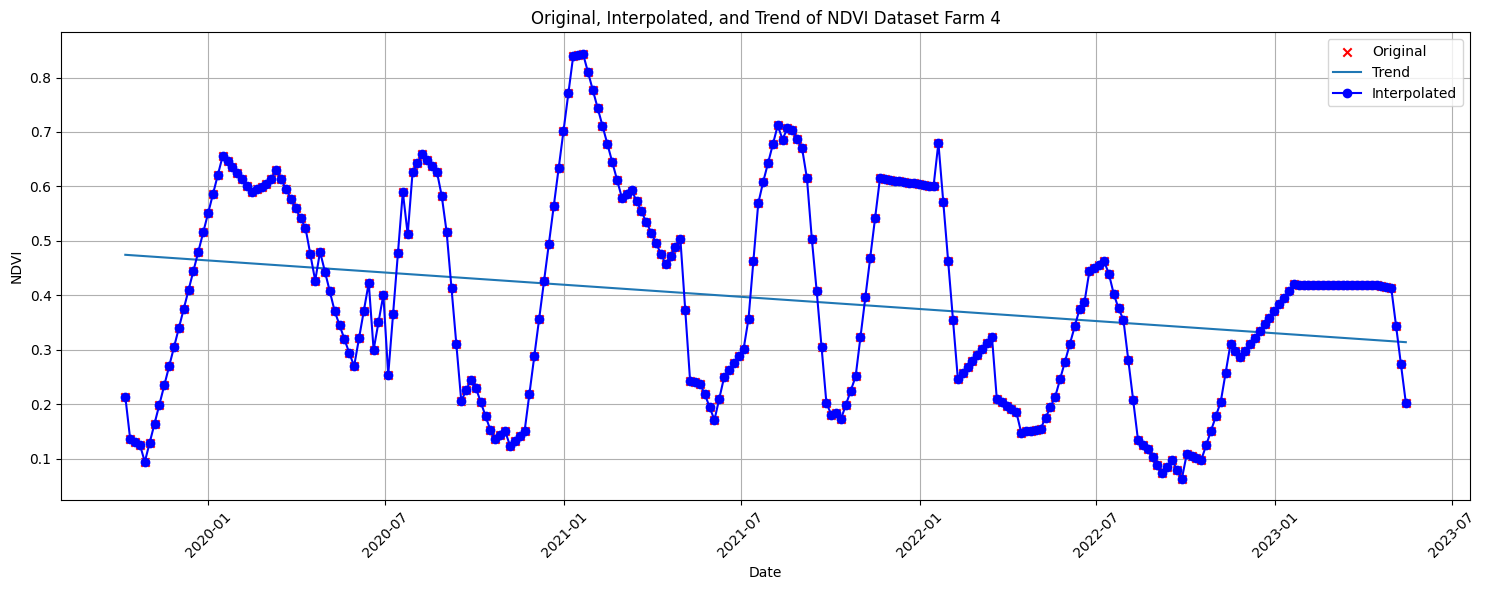

In [ ]:
# Plot the original data, interpolated values, and trend
plt.figure(figsize=(15, 6))
plt.scatter(df["Date"], df["NDVI"], marker="x", label="Original", color="red")
plt.plot(df_trend["Date"], trend, label="Trend")
plt.plot(df["Date"], df["NDVI"], "o-", label="Interpolated", color="blue")  # Adding the interpolated values
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Interpolated, and Trend of NDVI Dataset Farm 4")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Equation of the trend line: y = -0.000610x + 0.474446
Percentage change over the given time period: -5.14%


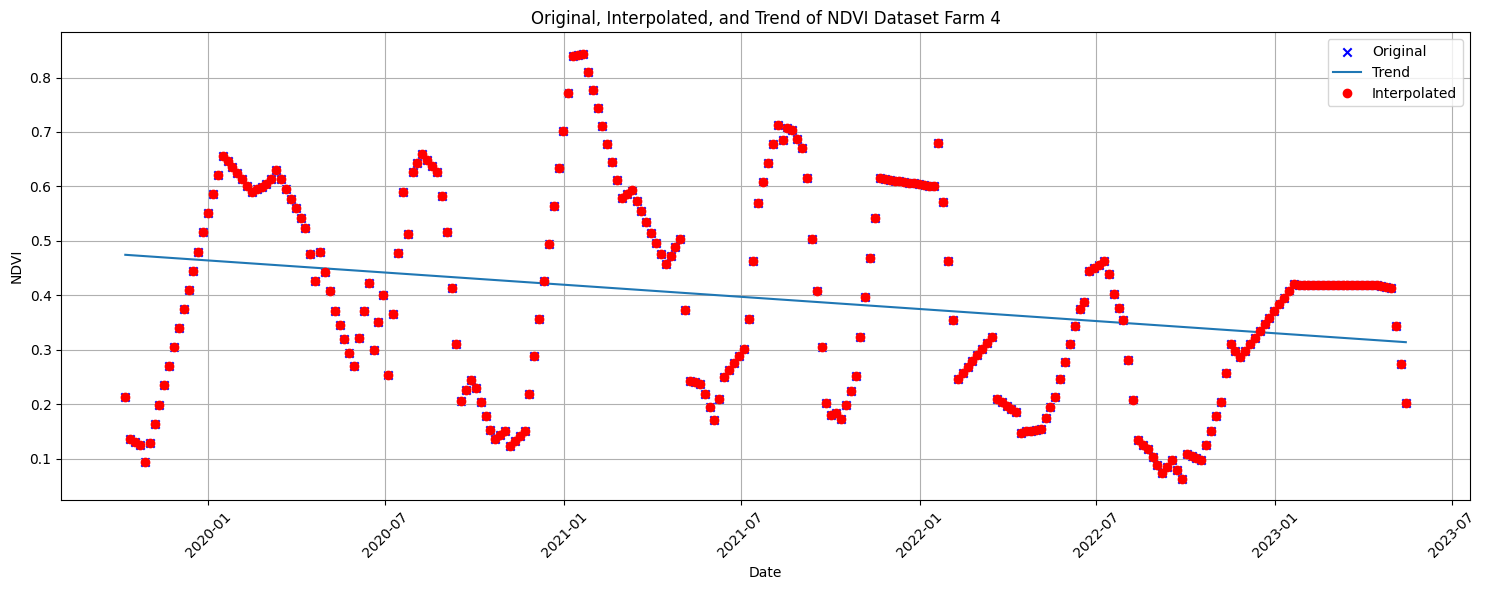

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('/content/farm4.csv')

# Rename the columns to "Date" and "NDVI"
df = df.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)

# Linearly interpolate missing values
df["NDVI"].interpolate(method='linear', inplace=True)

# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Remove rows with missing values
df_trend = df.dropna()

# Calculate the trend using linear regression
X = df_trend.index.values.reshape(-1, 1)
y = df_trend["NDVI"]
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Print the equation of the trend line (y = mx + b)
slope = model.coef_[0]
intercept = model.intercept_
print("Equation of the trend line: y = {:.6f}x + {:.6f}".format(slope, intercept))

# Calculate the percentage change of the NDVI values over the given time period
initial_ndvi = df_trend["NDVI"].iloc[0]
final_ndvi = df_trend["NDVI"].iloc[-1]
percentage_change = ((final_ndvi - initial_ndvi) / initial_ndvi) * 100
print("Percentage change over the given time period: {:.2f}%".format(percentage_change))

# Export the DataFrame to a CSV file
df.to_csv("/content/interpolated_data.csv", index=False)

# Plot the original data, interpolated values, and trend
plt.figure(figsize=(15, 6))
plt.scatter(df["Date"], df["NDVI"], marker="x", label="Original", color="blue")
plt.plot(df_trend["Date"], trend, label="Trend")
plt.plot(df["Date"], df["NDVI"], "o", label="Interpolated", color="red")  # Adding the interpolated values
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Interpolated, and Trend of NDVI Dataset Farm 4")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Equation of the trend line: y = -0.000610x + 0.474446
Percentage change over the given time period: -5.14%


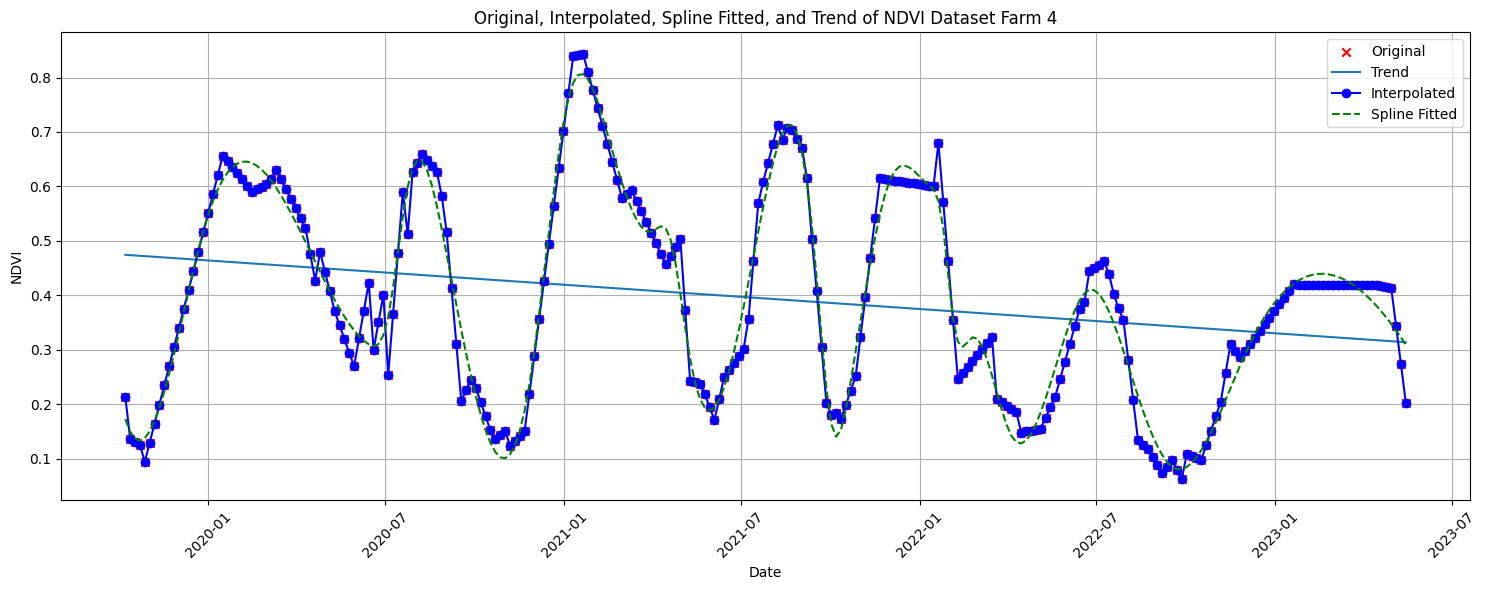

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import UnivariateSpline

# Load the data
df = pd.read_csv('/content/farm4.csv')

# Rename the columns to "Date" and "NDVI"
df = df.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)

# Linearly interpolate missing values
df["NDVI"].interpolate(method='linear', inplace=True)

# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Remove rows with missing values
df_trend = df.dropna()

# Calculate the trend using linear regression
X = df_trend.index.values.reshape(-1, 1)
y = df_trend["NDVI"]
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Print the equation of the trend line (y = mx + b)
slope = model.coef_[0]
intercept = model.intercept_
print("Equation of the trend line: y = {:.6f}x + {:.6f}".format(slope, intercept))

# Calculate the percentage change of the NDVI values over the given time period
initial_ndvi = df_trend["NDVI"].iloc[0]
final_ndvi = df_trend["NDVI"].iloc[-1]
percentage_change = ((final_ndvi - initial_ndvi) / initial_ndvi) * 100
print("Percentage change over the given time period: {:.2f}%".format(percentage_change))

# Apply spline fitting to the interpolated data
x = np.arange(len(df))
mask = ~np.isnan(df["NDVI"])
s_values = [0.35]

interpolated_values = []
spline = UnivariateSpline(x[mask], df["NDVI"][mask], k=3, s=s_values[0])
interpolated_values.append(spline(x))

# Export the DataFrame to a CSV file
df.to_csv("/content/interpolated_data.csv", index=False)

# Plot the original data, interpolated values, spline-fitted values, and trend
plt.figure(figsize=(15, 6))
plt.scatter(df["Date"], df["NDVI"], marker="x", label="Original", color="red")
plt.plot(df_trend["Date"], trend, label="Trend")
plt.plot(df["Date"], df["NDVI"], "o-", label="Interpolated", color="blue")
plt.plot(df["Date"], interpolated_values[0], "--", label="Spline Fitted", color="green")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Interpolated, Spline Fitted, and Trend of NDVI Dataset Farm 4")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
